In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

from datetime import datetime, time
from google.cloud import bigquery
from google.oauth2 import service_account

from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', None)
# pd.reset_option(‘max_columns’)

In [2]:
df=pd.read_csv('merged_data.csv',index_col=0)

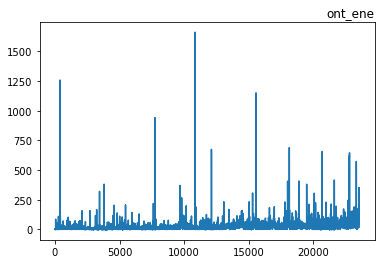

In [3]:
plt.figure()
plt.plot(df.values[:,-1])
plt.title('ont_ene',loc='right')
plt.show()

In [4]:
values=df.values.astype('float32')

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [6]:
scaled

array([[0.9078231 , 0.0141516 , 0.20030308, ..., 0.2657143 , 0.42241377,
        0.0027082 ],
       [0.9078231 , 0.0141516 , 0.19449353, ..., 0.2657143 , 0.42241377,
        0.0027082 ],
       [0.9078231 , 0.0141516 , 0.19449353, ..., 0.20571429, 0.42241377,
        0.0027082 ],
       ...,
       [0.5649247 , 0.4290318 , 0.4758777 , ..., 0.64514285, 0.9959165 ,
               nan],
       [0.5649247 , 0.3962449 , 0.33720636, ..., 0.5942857 , 0.9959165 ,
               nan],
       [0.5649247 , 0.20540844, 0.28845668, ..., 0.94285715, 0.9959165 ,
               nan]], dtype=float32)

In [8]:
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [9]:
df.tail()

,int_nuc_sch,int_gas_sch,int_hyd_sch,int_win_sch,imp_mic_sch,imp_new_sch,imp_que_sch,ont_avg_dem,exp_mic_sch,exp_new_sch,exp_que_sch,ont_ene
mkt_datetime,,,,,,,,,,,,
2022-09-08 19:00:00,9415,4183,4491,339,366,650,9,18660,-355,-380,-9,NaN
2022-09-08 20:00:00,9415,3976,4218,406,305,250,9,17742,-418,-380,-9,NaN
2022-09-08 21:00:00,9415,3177,3948,484,280,0,9,16484,-645,-621,-9,NaN
2022-09-08 22:00:00,9415,2943,3399,526,0,0,9,15062,-855,-710,-9,NaN
2022-09-08 23:00:00,9415,1581,3206,564,0,0,9,14132,-695,-100,-9,NaN


In [27]:
data=scaled[:23554]
X=data[:,:-1]
y=data[:,-1]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=1)

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = lin_reg.predict(X_test)


In [32]:
from sklearn.metrics import mean_squared_error
J_mse = mean_squared_error(y_pred, y_test)

In [33]:
R_square = lin_reg.score(X_test,y_test)

In [34]:
print(R_square)

0.28038665429950205


In [35]:
J_mse

0.00026977356

In [ ]:
lin_reg.predict()